# Spotify

Spotify is a Swedish audio streaming and media service provider founded on 23 April 2006 by Daniel Ek and Martin Lorentzon.
It is one of the largest music streaming service providers, with over 615 million monthly active users, including 239 million paying subscribers, as of March 2024.
Spotify has transformed how people consume music, making it more accessible and personalized.
Whether you are a casual listener or a music enthusiast, Spotify offers tools and features to enhance your listening experience.

# Objective

Our primary objective is  to provide insights into music popularity dynamics across platforms which is Spotify and Apple Music charts. 
This involves leveraging machine learning techniques to identify patterns and correlations within the data, ultimately
enabling us to derive a meaningful ratio between the streams.

# Target Feature

in_spotify_charts

In [1]:
# importing the necesary libraries

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the csv file
df = pd.read_csv('spotify.csv', encoding='latin1')

# displaying the first 5 rows
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Characterization of the dataset

### Features

In [3]:
# displaying the column names / fetures of the dataset
df.columns


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [4]:
# printing out the statistical properties of the dataset
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [5]:
# displaying the total no. of columns and no. of rows
df.shape


(953, 24)

In [6]:
# displaying the the last 5 rows()
df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [7]:
# to display info about data types, null values and column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# Plotting the heatmap for the dataset

<AxesSubplot: >

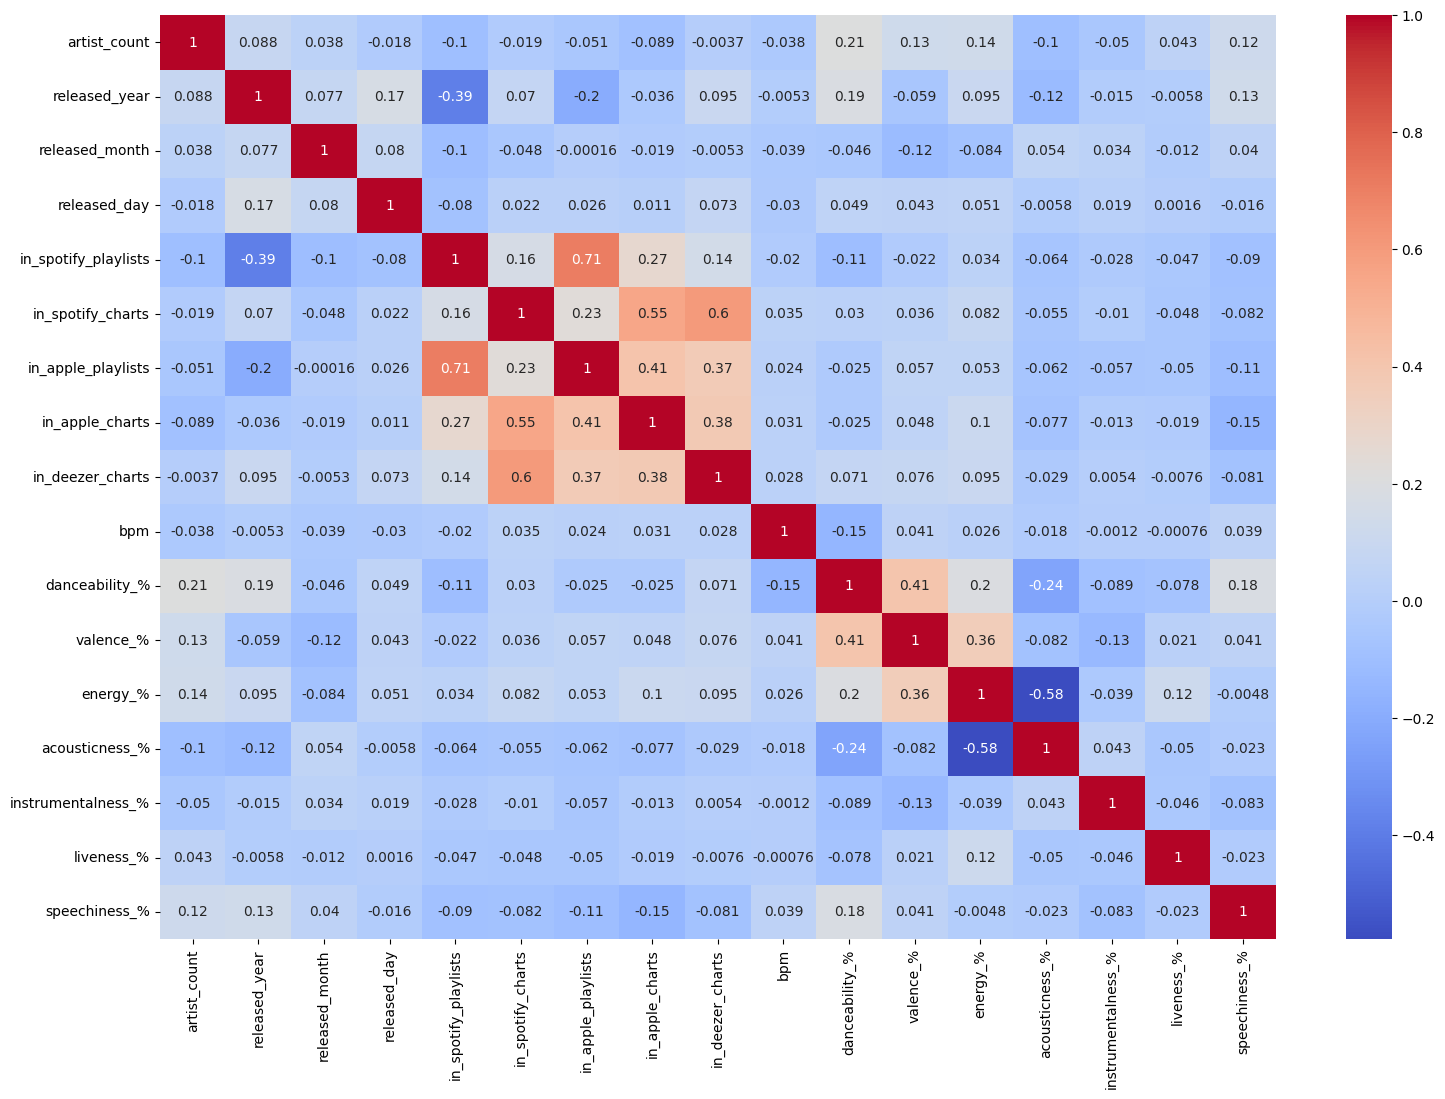

In [8]:
# Creates a new figure for heatmap visualization
plt.figure(figsize= (18,12))

# Generates a heatmap of the correlation matrix of the DataFrame
# df.corr(): This computes the pairwise correlation of columns in the DataFrame df
# annot=True: This parameter specifies whether to annotate the heatmap with the correlation values.
# cmap='coolwarm': This parameter sets the color map (colormap) for the heatmap.


sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# correlation between Spotify and Apple Music charts

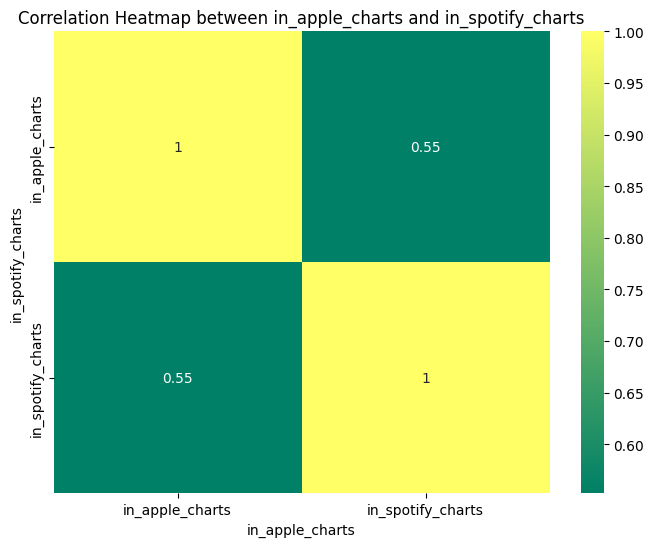

In [9]:
column1 = 'in_apple_charts'
column2 = 'in_spotify_charts'

# Computing correlation between the selected columns
correlation = df[[column1, column2]].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='summer')

# Adding the title for the plot
plt.title(f'Correlation Heatmap between {column1} and {column2}')

# Adding the label names
plt.xlabel(column1)
plt.ylabel(column2)

# Displaying the plot 
plt.show()

# Calculating Signal-to-Noise Ratio

In [10]:
# Calculate Signal
signal_apple = df['in_apple_charts'].sum()
signal_spotify = df['in_spotify_charts'].sum()

# Calculate Noise
total_entries = len(df)
noise_apple = total_entries - signal_apple
noise_spotify = total_entries - signal_spotify

# Calculate Signal-to-Noise Ratio (SNR)
snr_apple = signal_apple / noise_apple
snr_spotify = signal_spotify / noise_spotify

print(f"Signal-to-Noise Ratio (Apple Charts): {snr_apple}")
print(f"Signal-to-Noise Ratio (Spotify Charts): {snr_spotify}")

Signal-to-Noise Ratio (Apple Charts): -1.0196430043696925
Signal-to-Noise Ratio (Spotify Charts): -1.0908311094166985


# Continuity of data

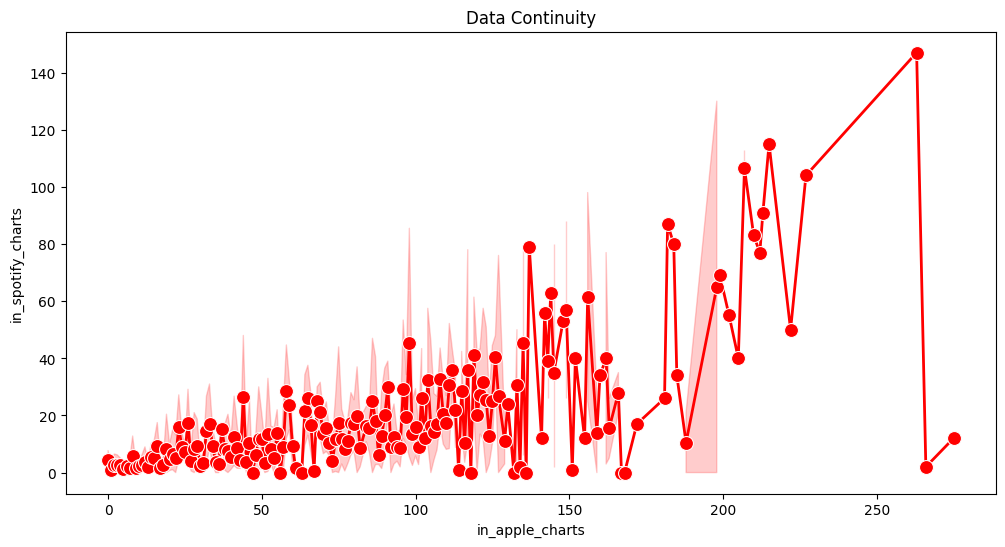

Standard Deviation: 19.575991636056173


In [14]:
# Computing the difference between each element and previous elements in the series 
df['diff'] = df['in_spotify_charts'].diff()

# Visualize continuity (smoothness) in the data
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='in_apple_charts', y='in_spotify_charts', marker='o', markersize=10, linestyle='-', linewidth=2 ,color="red")

plt.title('Data Continuity') z
plt.xlabel('in_apple_charts')
plt.ylabel('in_spotify_charts')

plt.show()

# Calculate statistical measures
std_deviation = df['in_spotify_charts'].std()
print(f"Standard Deviation: {std_deviation}")


# Conclusion

The correlation between Apple charts and Spotify charts is 0.55, indicating a moderate positive relationship. This suggests that, generally, as rankings on Apple charts improve, Spotify charts tend to show a similar trend, though not perfectly. While there is a significant connection, other factors also influence the rankings on these platforms.